In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("2023_Taxi_5M.csv")

/tmp/ipython-input-729068485.py:1: DtypeWarning: Columns (4,10,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("2023_Taxi_5M.csv")


In [ ]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,01/01/2023 12:32:10 AM,01/01/2023 12:40:36 AM,1.0,0.97,1.0,N,161,141,2.0,9.3,1.0,0.5,0.00,0.0,1.0,14.3,2.5,0.00
1,2,01/01/2023 12:39:42 AM,01/01/2023 12:50:36 AM,1.0,3.01,1.0,N,141,107,2.0,14.9,1.0,0.5,0.00,0.0,1.0,19.9,2.5,0.00
2,2,01/01/2023 12:09:29 AM,01/01/2023 12:29:23 AM,2.0,11.43,1.0,N,138,33,1.0,44.3,6.0,0.5,13.26,0.0,1.0,66.31,0.0,1.25
3,2,01/01/2023 12:45:11 AM,01/01/2023 01:07:39 AM,1.0,2.23,1.0,N,90,48,1.0,19.8,1.0,0.5,4.96,0.0,1.0,29.76,2.5,0.00
4,1,01/01/2023 12:51:45 AM,01/01/2023 12:58:18 AM,1.0,1.4,1.0,N,137,79,1.0,9.3,3.5,0.5,2.85,0.0,1.0,17.15,2.5,0.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4278823 entries, 0 to 4278822
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          object 
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           float64
 10  fare_amount            object 
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           object 
 17  congestion_surcharge   float64
 18  airport_fee            float64
dtypes: float64(10), int64(3), object(6)
memory usage: 620.3+ MB


In [ ]:
df.isna().sum()

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,130107
trip_distance,0
RatecodeID,130107
store_and_fwd_flag,130107
PULocationID,0
DOLocationID,0
payment_type,1


In [ ]:
df['airport_fee'] = df['airport_fee'].fillna(0)
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(0)


In [ ]:
print(df['passenger_count'].mean())

1.367321118148362


In [ ]:
df['passenger_count'] = df['passenger_count'].fillna(1)

df = df.drop(columns=['store_and_fwd_flag'])
df['RatecodeID'] = df['RatecodeID'].fillna(99)

In [ ]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

/tmp/ipython-input-1208249868.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
/tmp/ipython-input-1208249868.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])


In [ ]:
df.select_dtypes(include=['number']).agg([ 'min', 'max','mean']).T

,min,max,mean
VendorID,1.00,6.00,1.738111
passenger_count,0.00,9.00,1.356152
RatecodeID,1.00,99.00,4.580434
PULocationID,1.00,265.00,165.163665
DOLocationID,1.00,265.00,163.940594
payment_type,0.00,4.00,1.188986
extra,-7.50,96.38,1.568548
mta_tax,-0.50,5.75,0.486007
tip_amount,-81.00,480.10,3.518550
tolls_amount,-49.85,196.99,0.588766


In [ ]:
df['trip_distance'] = df['trip_distance'].str.replace(',', '', regex=False)

df['trip_distance'] = df['trip_distance'].astype(float)


In [ ]:
float_cols = [
    'passenger_count',
    'trip_distance',
    'RatecodeID',
    'fare_amount',
    'extra',
    'mta_tax',
    'tip_amount',
    'tolls_amount',
    'improvement_surcharge',
    'total_amount',
    'congestion_surcharge',
    'airport_fee'
]

for col in float_cols:
    if col in df.columns:
        df[col] = (
            df[col]
            .astype(str)
            .str.replace(',', '', regex=False)
        )
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
df.select_dtypes(include=['number']).agg([ 'min', 'max','mean']).T

,min,max,mean
VendorID,1.00,6.00,1.738111
passenger_count,0.00,9.00,1.356152
trip_distance,0.00,335004.33,5.948710
RatecodeID,1.00,99.00,4.580434
PULocationID,1.00,265.00,165.163665
DOLocationID,1.00,265.00,163.940594
payment_type,0.00,4.00,1.188986
fare_amount,-900.00,386983.63,19.598446
extra,-7.50,96.38,1.568548
mta_tax,-0.50,5.75,0.486007


In [ ]:
df = df[df['trip_distance'] > 0.5]
df = df[df['trip_distance'] < 100]

df = df[~df.select_dtypes('number').lt(0).any(axis=1)]

In [ ]:
df.select_dtypes(include=['number']).agg([ 'min', 'max','mean']).T

,min,max,mean
VendorID,1.00,6.00,1.747906
passenger_count,0.00,9.00,1.337836
trip_distance,0.51,99.76,3.686328
RatecodeID,1.00,99.00,7.651442
PULocationID,1.00,265.00,164.975514
DOLocationID,1.00,265.00,163.595329
payment_type,0.00,4.00,1.115288
fare_amount,0.00,1025.00,20.360364
extra,0.00,14.25,1.610381
mta_tax,0.00,5.75,0.496961


In [ ]:
df = df[df['total_amount'] > 3.7]

df.select_dtypes(include=['number']).agg([ 'min', 'max','mean']).T

,min,max,mean
VendorID,1.00,6.00,1.747953
passenger_count,0.00,9.00,1.337851
trip_distance,0.51,99.76,3.686093
RatecodeID,1.00,99.00,7.649950
PULocationID,1.00,265.00,164.976648
DOLocationID,1.00,265.00,163.595775
payment_type,0.00,4.00,1.115181
fare_amount,0.00,1025.00,20.362166
extra,0.00,14.25,1.610515
mta_tax,0.00,5.75,0.496997


In [ ]:
df = df[df['passenger_count'] >= 1]

In [ ]:
df.select_dtypes(include=['number']).agg([ 'min', 'max','mean','median','std']).T

,min,max,mean,median,std
VendorID,1.00,6.00,1.759152,2.00,0.441703
passenger_count,1.00,9.00,1.357890,1.00,0.856223
trip_distance,0.51,99.76,3.695883,1.94,4.585362
RatecodeID,1.00,99.00,7.748972,1.00,24.706680
PULocationID,1.00,265.00,164.944502,162.00,64.111443
DOLocationID,1.00,265.00,163.578450,162.00,69.923377
payment_type,0.00,4.00,1.113693,1.00,0.514395
fare_amount,0.00,1025.00,20.398935,14.20,17.795989
extra,0.00,14.25,1.583503,1.00,1.840527
mta_tax,0.00,5.75,0.496983,0.50,0.039211


In [ ]:
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day
df['pickup_weekend'] = df['tpep_pickup_datetime'].dt.weekday >= 4 # Friday=4, Saturday=5, Sunday=6
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month
df['pickup_year'] = df['tpep_pickup_datetime'].dt.year
df['dropoff_hour'] = df['tpep_dropoff_datetime'].dt.hour
df['dropoff_day'] = df['tpep_dropoff_datetime'].dt.day
df['dropoff_weekend'] = df['tpep_dropoff_datetime'].dt.weekday >= 4 # Friday=4, Saturday=5, Sunday=6
df['dropoff_month'] = df['tpep_dropoff_datetime'].dt.month
df['dropoff_year'] = df['tpep_dropoff_datetime'].dt.year

df.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,pickup_hour,pickup_day,pickup_weekend,pickup_month,pickup_year,dropoff_hour,dropoff_day,dropoff_weekend,dropoff_month,dropoff_year
131072,2,2023-01-12 09:58:04,2023-01-12 10:13:08,1.0,1.98,1.0,143,141,1.0,14.9,...,9,12,False,1,2023,10,12,False,1,2023
131073,2,2023-01-12 09:07:47,2023-01-12 09:36:28,1.0,3.44,1.0,43,234,1.0,26.1,...,9,12,False,1,2023,9,12,False,1,2023
131074,2,2023-01-12 09:39:29,2023-01-12 09:58:25,1.0,2.36,1.0,236,161,1.0,17.7,...,9,12,False,1,2023,9,12,False,1,2023
131075,2,2023-01-12 09:14:18,2023-01-12 09:29:54,1.0,1.82,1.0,141,137,2.0,14.9,...,9,12,False,1,2023,9,12,False,1,2023
131076,2,2023-01-12 09:41:56,2023-01-12 09:59:12,1.0,5.94,1.0,132,28,1.0,26.1,...,9,12,False,1,2023,9,12,False,1,2023


In [ ]:
df['trip_duration_min'] = (
    (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime'])
    .dt.total_seconds() / 60
)

df = df[df['trip_duration_min'] > 0]

In [ ]:
df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']

In [ ]:
df['tip_percent'] = df['tip_amount'] / df['fare_amount']

In [ ]:
df.groupby('pickup_weekend')['total_amount'].mean()

,total_amount
pickup_weekend,
False,29.972848
True,29.212195


In [ ]:
df.groupby('pickup_weekend')['total_amount'].median()

,total_amount
pickup_weekend,
False,22.2
True,21.3


In [ ]:
df['calculated_total'] = (
    df['fare_amount'] +
    df['extra'] +
    df['mta_tax'] +
    df['tip_amount'] +
    df['tolls_amount'] +
    df['improvement_surcharge'] +
    df['congestion_surcharge'] +
    df['airport_fee']
)

df['total_diff'] = df['total_amount'] - df['calculated_total']

In [ ]:
df['total_diff'].abs().describe().round(2)

,total_diff
count,1609793.00
mean,0.70
std,1.15
min,0.00
25%,0.00
50%,0.00
75%,2.50
max,4.50


In [ ]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,dropoff_hour,dropoff_day,dropoff_weekend,dropoff_month,dropoff_year,trip_duration_min,fare_per_mile,tip_percent,calculated_total,total_diff
131072,2,2023-01-12 09:58:04,2023-01-12 10:13:08,1.0,1.98,1.0,143,141,1.0,14.9,...,10,12,False,1,2023,15.066667,7.525253,0.134228,20.90,0.0
131073,2,2023-01-12 09:07:47,2023-01-12 09:36:28,1.0,3.44,1.0,43,234,1.0,26.1,...,9,12,False,1,2023,28.683333,7.587209,0.153257,34.10,0.0
131074,2,2023-01-12 09:39:29,2023-01-12 09:58:25,1.0,2.36,1.0,236,161,1.0,17.7,...,9,12,False,1,2023,18.933333,7.500000,0.245198,26.04,0.0
131075,2,2023-01-12 09:14:18,2023-01-12 09:29:54,1.0,1.82,1.0,141,137,2.0,14.9,...,9,12,False,1,2023,15.600000,8.186813,0.000000,18.90,0.0
131076,2,2023-01-12 09:41:56,2023-01-12 09:59:12,1.0,5.94,1.0,132,28,1.0,26.1,...,9,12,False,1,2023,17.266667,4.393939,0.114943,31.85,0.0


/tmp/ipython-input-1569673394.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pickup_hour', data=df, palette='viridis')


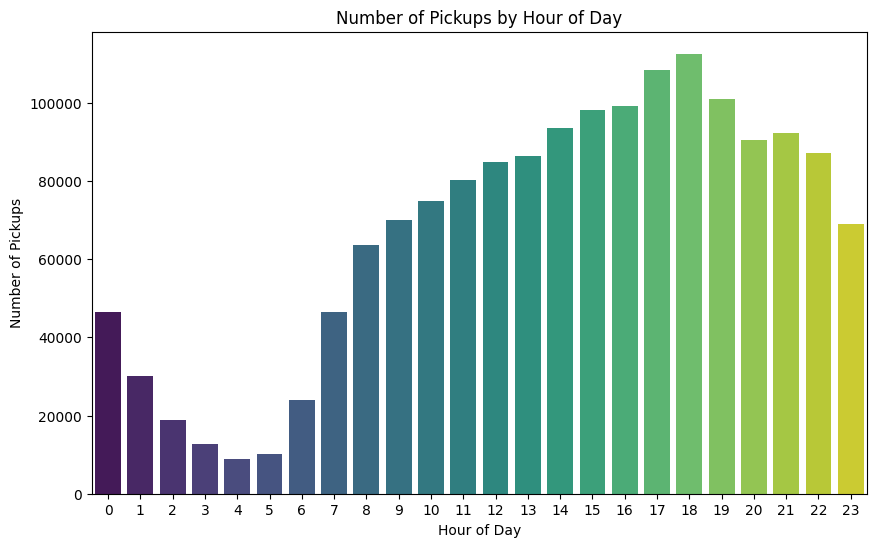

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='pickup_hour', data=df, palette='viridis')
plt.title('Number of Pickups by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.show()

In [ ]:
df.groupby('pickup_weekend')['total_amount'].mean().round(2)


,total_amount
pickup_weekend,
False,29.97
True,29.21


/tmp/ipython-input-1988818216.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='pickup_weekend', y='total_amount', data=df, palette='viridis')


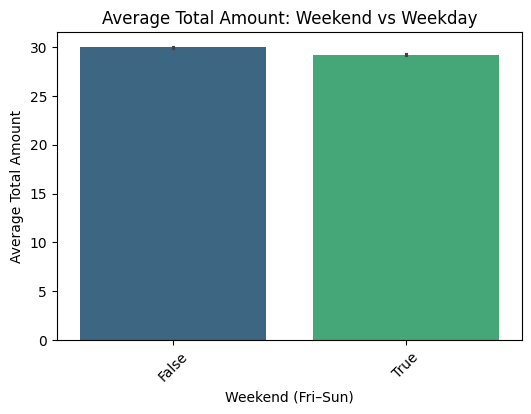

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x='pickup_weekend', y='total_amount', data=df, palette='viridis')
plt.xticks(rotation=45)
plt.title('Average Total Amount: Weekend vs Weekday')
plt.xlabel('Weekend (Fri–Sun)')
plt.ylabel('Average Total Amount')
plt.show()


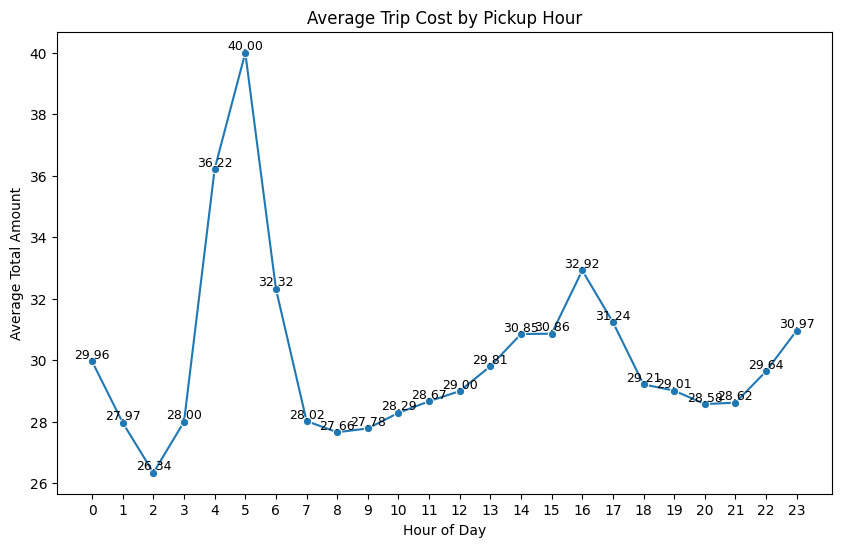

In [ ]:
hourly_avg = (
    df.groupby('pickup_hour')['total_amount']
    .mean()
    .reset_index()
)

plt.figure(figsize=(10, 6))
sns.lineplot(
    x='pickup_hour',
    y='total_amount',
    data=hourly_avg,
    marker='o'
)

for _, row in hourly_avg.iterrows():
    plt.text(
        row['pickup_hour'],
        row['total_amount'],
        f"{row['total_amount']:.2f}",
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.title('Average Trip Cost by Pickup Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Total Amount')
plt.xticks(range(0, 24))
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


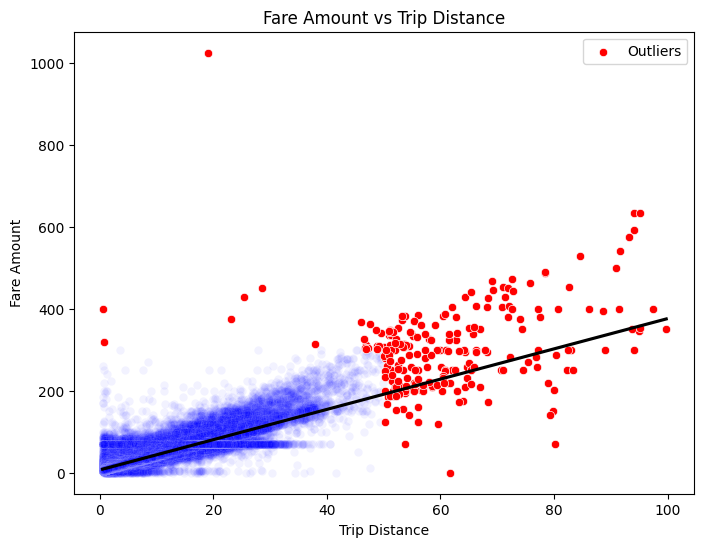

In [ ]:
outliers = df[
    (df['trip_distance'] > 50) |
    (df['fare_amount'] > 300)
]

plt.figure(figsize=(8, 6))

# נקודות רגילות
sns.scatterplot(
    x='trip_distance',
    y='fare_amount',
    data=df,
    alpha=0.05,
    color='blue'
)

# חריגים
sns.scatterplot(
    x='trip_distance',
    y='fare_amount',
    data=outliers,
    color='red',
    label='Outliers'
)

# קו רגרסיה
sns.regplot(
    x='trip_distance',
    y='fare_amount',
    data=df,
    scatter=False,
    color='black'
)

plt.title('Fare Amount vs Trip Distance')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.legend()
plt.show()


/tmp/ipython-input-1626809601.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


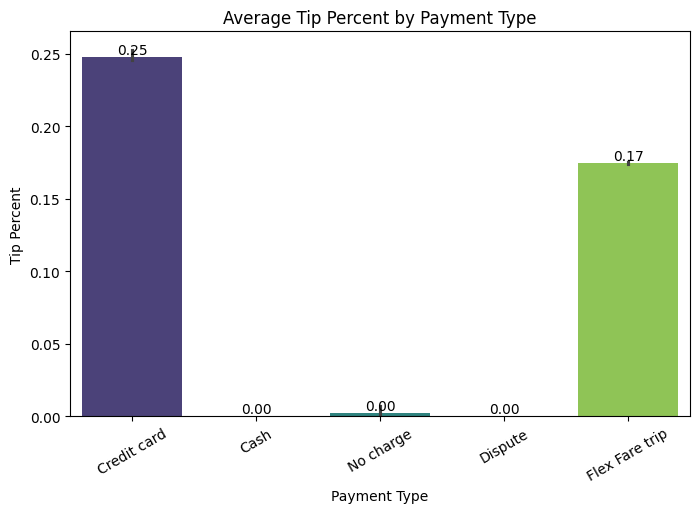

In [ ]:
payment_map = {
    0: 'Flex Fare trip',
    1: 'Credit card',
    2: 'Cash',
    3: 'No charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided trip'
}

df['payment_type_label'] = df['payment_type'].map(payment_map)


plt.figure(figsize=(8, 5))

ax = sns.barplot(
    x='payment_type_label',
    y='tip_percent',
    data=df,
    palette='viridis'
)

# הוספת הערכים מעל העמודות
for p in ax.patches:
    value = p.get_height()
    ax.annotate(
        f"{value:.2f}",
        (p.get_x() + p.get_width() / 2., value),
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title('Average Tip Percent by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Tip Percent')
plt.xticks(rotation=30)
plt.show()


/tmp/ipython-input-2133174923.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


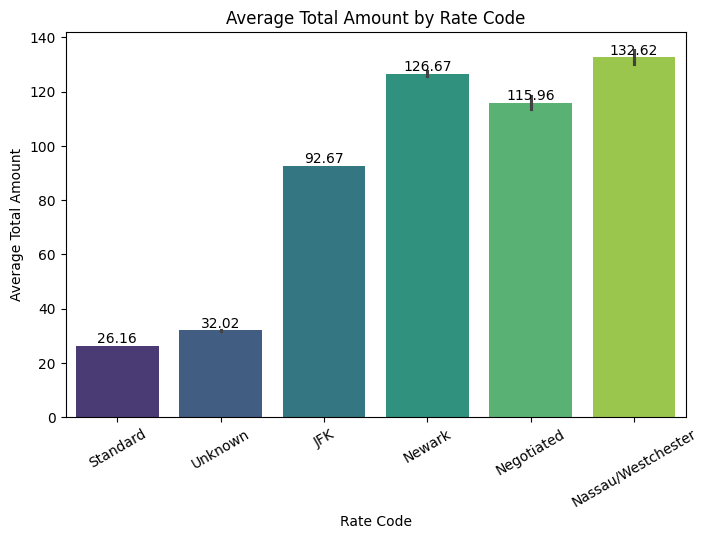

In [ ]:
ratecode_map = {
    1: 'Standard',
    2: 'JFK',
    3: 'Newark',
    4: 'Nassau/Westchester',
    5: 'Negotiated',
    6: 'Group ride',
    99: 'Unknown'
}

df['Ratecode_label'] = df['RatecodeID'].map(ratecode_map)


plt.figure(figsize=(8, 5))

ax = sns.barplot(
    x='Ratecode_label',
    y='total_amount',
    data=df,
    palette='viridis'
)

# הוספת הערכים מעל העמודות
for p in ax.patches:
    value = p.get_height()
    ax.annotate(
        f"{value:.2f}",
        (p.get_x() + p.get_width() / 2., value),
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title('Average Total Amount by Rate Code')
plt.xlabel('Rate Code')
plt.ylabel('Average Total Amount')
plt.xticks(rotation=30)
plt.show()



In [ ]:
df.groupby('Ratecode_label')['trip_distance'].mean().round(2)


,trip_distance
Ratecode_label,
JFK,18.25
Nassau/Westchester,20.46
Negotiated,15.50
Newark,18.06
Standard,2.89
Unknown,4.84


In [ ]:
df.groupby('Ratecode_label')['trip_duration_min'].mean().round(2)


,trip_duration_min
Ratecode_label,
JFK,52.79
Nassau/Westchester,42.49
Negotiated,40.80
Newark,44.31
Standard,16.41
Unknown,21.94


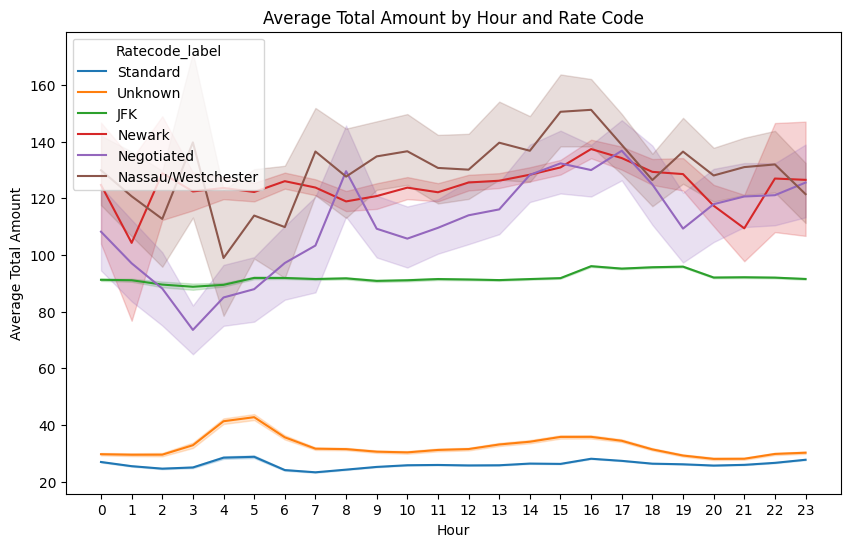

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    x='pickup_hour',
    y='total_amount',
    hue='Ratecode_label',
    data=df,
    estimator='mean'
)
plt.title('Average Total Amount by Hour and Rate Code')
plt.xlabel('Hour')
plt.ylabel('Average Total Amount')
plt.xticks(range(0, 24))
plt.show()

In [ ]:
df.groupby(['Ratecode_label', 'pickup_weekend'])['total_amount'].mean().round(2)


Ratecode_label      pickup_weekend
JFK                 False              93.06
                    True               92.05
Nassau/Westchester  False             131.29
                    True              134.93
Negotiated          False             118.54
                    True              112.37
Newark              False             127.22
                    True              125.88
Standard            False              26.61
                    True               25.37
Unknown             False              32.12
                    True               31.89
Name: total_amount, dtype: float64

In [ ]:
df[df['Ratecode_label'] == 'Unknown'].shape[0] / df.shape[0]


0.06818764897101677

In [ ]:
df.groupby('Ratecode_label')[['trip_distance','trip_duration_min','total_amount']].mean().round(2)


,trip_distance,trip_duration_min,total_amount
Ratecode_label,,,
JFK,18.25,52.79,92.67
Nassau/Westchester,20.46,42.49,132.62
Negotiated,15.50,40.80,115.96
Newark,18.06,44.31,126.67
Standard,2.89,16.41,26.16
Unknown,4.84,21.94,32.02


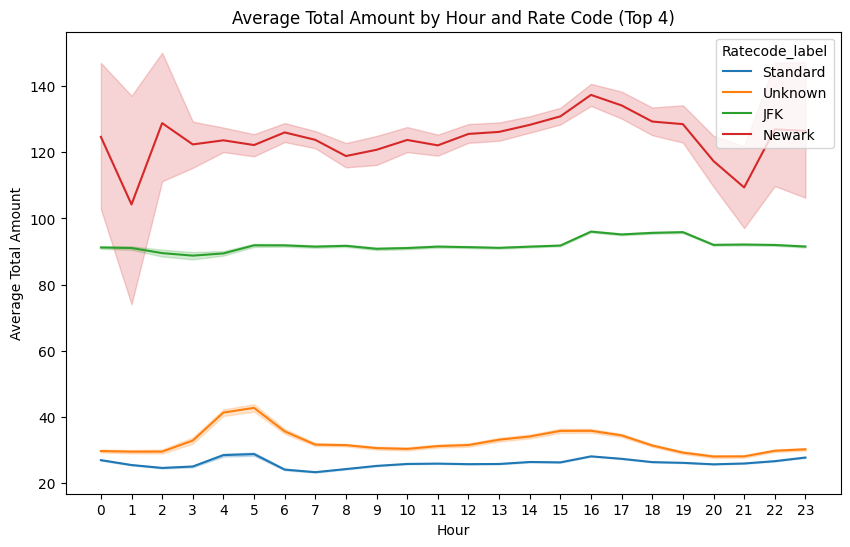

In [ ]:
top_ratecodes = df['Ratecode_label'].value_counts().head(4).index  # 4 הכי נפוצים
df_top = df[df['Ratecode_label'].isin(top_ratecodes)]

plt.figure(figsize=(10,6))
sns.lineplot(x='pickup_hour', y='total_amount', hue='Ratecode_label', data=df_top, estimator='mean')
plt.title('Average Total Amount by Hour and Rate Code (Top 4)')
plt.xlabel('Hour')
plt.ylabel('Average Total Amount')
plt.xticks(range(0,24))
plt.show()


In [ ]:
df['total_diff_abs'] = df['total_diff'].abs()
df['total_diff_abs'].describe().round(2)


,total_diff_abs
count,1609793.00
mean,0.70
std,1.15
min,0.00
25%,0.00
50%,0.00
75%,2.50
max,4.50


In [ ]:
{
    "diff<=0.01": (df['total_diff_abs'] <= 0.01).mean(),
    "diff<=1.00": (df['total_diff_abs'] <= 1.00).mean(),
    "diff<=2.50": (df['total_diff_abs'] <= 2.50).mean(),
}


{'diff<=0.01': np.float64(0.7225450725652305),
 'diff<=1.00': np.float64(0.7225463149609919),
 'diff<=2.50': np.float64(0.9622821070783635)}

In [ ]:
df['has_tip'] = df['tip_amount'] > 0


In [ ]:
df['has_tip'].mean().round(3) * 100 # %

np.float64(79.2)

In [ ]:
df.groupby('payment_type_label')['has_tip'].agg(
    trips='count',
    tip_rate='mean'
).round(3)


,trips,tip_rate
payment_type_label,,
Cash,250384,0.000
Credit card,1244981,0.956
Dispute,8639,0.001
Flex Fare trip,101554,0.823
No charge,4235,0.000


/tmp/ipython-input-1545293828.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


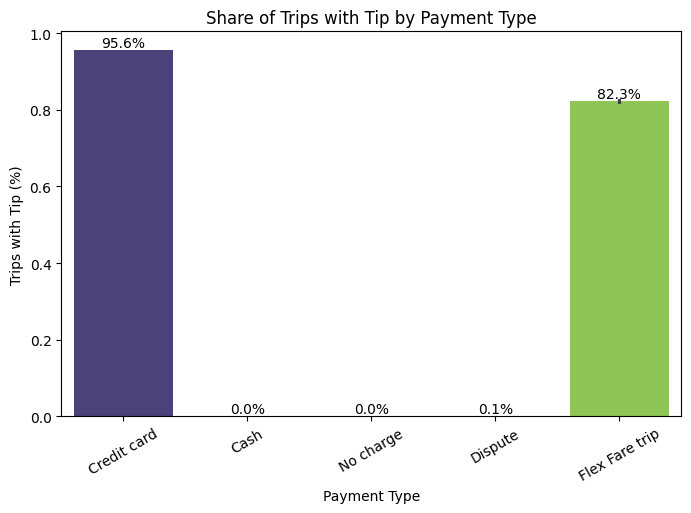

In [ ]:
plt.figure(figsize=(8,5))
ax = sns.barplot(
    x='payment_type_label',
    y='has_tip',
    data=df,
    palette='viridis'
)

for p in ax.patches:
    v = p.get_height()
    ax.annotate(
        f"{v*100:.1f}%",
        (p.get_x() + p.get_width()/2, v),
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title('Share of Trips with Tip by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Trips with Tip (%)')
plt.xticks(rotation=30)
plt.show()


In [ ]:
df.groupby('payment_type_label').agg(
    tip_rate=('has_tip', 'mean'),
    avg_tip_amount=('tip_amount', 'mean'),
    avg_tip_percent=('tip_percent', 'mean'),
    trips=('has_tip', 'count')
).round(3)


,tip_rate,avg_tip_amount,avg_tip_percent,trips
payment_type_label,,,,
Cash,0.000,0.000,0.000,250384
Credit card,0.956,4.462,inf,1244981
Dispute,0.001,0.003,0.000,8639
Flex Fare trip,0.823,3.770,inf,101554
No charge,0.000,0.024,0.003,4235


In [ ]:
df.groupby('pickup_hour')['has_tip'].mean().round(3)


,has_tip
pickup_hour,
0,0.789
1,0.782
2,0.771
3,0.749
4,0.704
5,0.698
6,0.748
7,0.806
8,0.818


In [ ]:
df.groupby('pickup_weekend')['has_tip'].mean().round(3)


,has_tip
pickup_weekend,
False,0.800
True,0.778


In [ ]:
df.groupby('Ratecode_label')['has_tip'].mean().round(3)


,has_tip
Ratecode_label,
JFK,0.761
Nassau/Westchester,0.614
Negotiated,0.663
Newark,0.753
Standard,0.796
Unknown,0.762


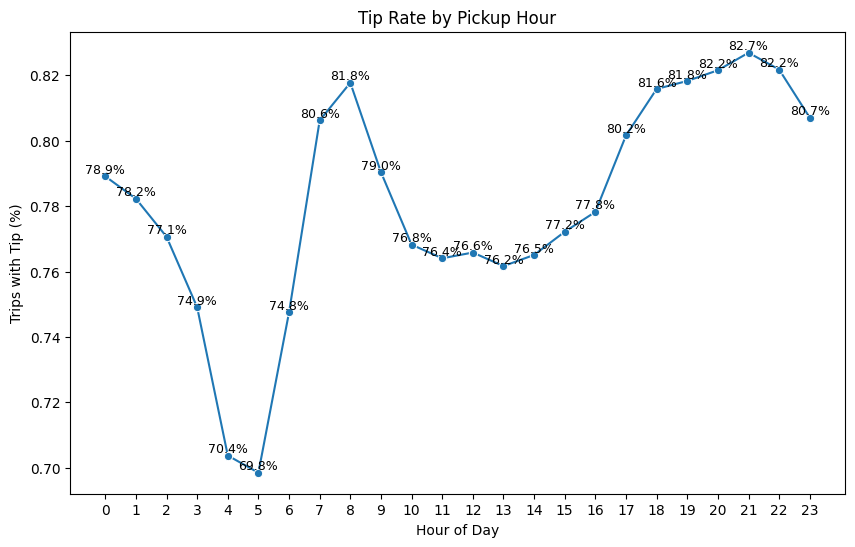

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(x='pickup_hour', y='has_tip', data=tip_by_hour, marker='o')

for _, row in tip_by_hour.iterrows():
    plt.text(
        row['pickup_hour'],
        row['has_tip'],
        f"{row['has_tip']*100:.1f}%",
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.title('Tip Rate by Pickup Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Trips with Tip (%)')
plt.xticks(range(0,24))
plt.show()


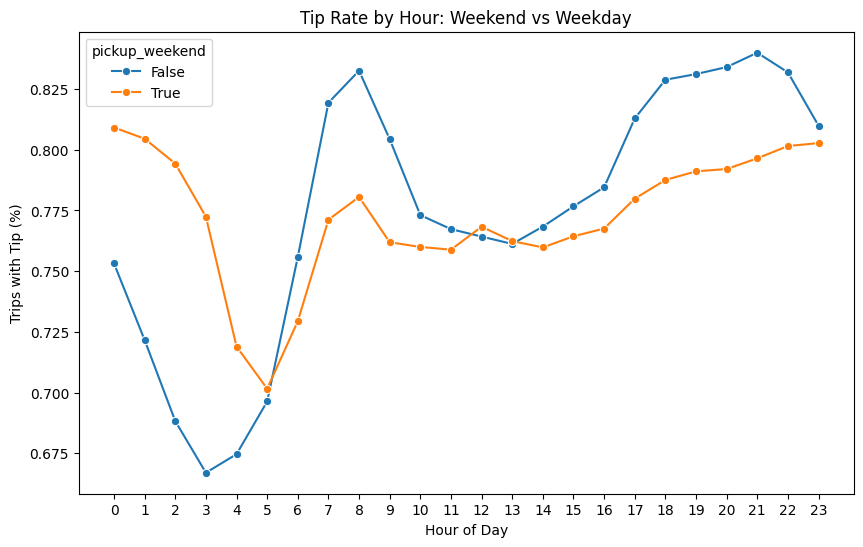

In [ ]:
tip_hour_weekend = (
    df.groupby(['pickup_hour','pickup_weekend'])['has_tip']
    .mean()
    .reset_index()
)

plt.figure(figsize=(10,6))
sns.lineplot(
    x='pickup_hour',
    y='has_tip',
    hue='pickup_weekend',
    data=tip_hour_weekend,
    marker='o'
)

plt.title('Tip Rate by Hour: Weekend vs Weekday')
plt.xlabel('Hour of Day')
plt.ylabel('Trips with Tip (%)')
plt.xticks(range(0,24))
plt.show()


In [ ]:
driver_hourly = (
    df.groupby('pickup_hour')
    .agg(
        trips=('total_amount','count'),
        avg_fare=('total_amount','mean'),
        tip_rate=('has_tip','mean')
    )
    .round(3)
    .reset_index()
)

driver_hourly


,pickup_hour,trips,avg_fare,tip_rate
0,0,46517,29.960,0.789
1,1,30063,27.966,0.782
2,2,18875,26.344,0.771
3,3,12702,28.000,0.749
4,4,8985,36.222,0.704
5,5,10092,40.000,0.698
6,6,24055,32.324,0.748
7,7,46423,28.023,0.806
8,8,63742,27.660,0.818
9,9,69999,27.783,0.790


In [ ]:
driver_weekend = (
    df.groupby(['pickup_hour','pickup_weekend'])
    .agg(
        trips=('total_amount','count'),
        avg_fare=('total_amount','mean'),
        tip_rate=('has_tip','mean')
    )
    .round(3)
    .reset_index()
)

driver_weekend


,pickup_hour,pickup_weekend,trips,avg_fare,tip_rate
0,0,False,16636,33.162,0.753
1,0,True,29881,28.178,0.809
2,1,False,8065,32.338,0.722
3,1,True,21998,26.363,0.805
4,2,False,4209,30.185,0.688
5,2,True,14666,25.241,0.794
6,3,False,2811,32.630,0.667
7,3,True,9891,26.684,0.772
8,4,False,3089,43.487,0.675
9,4,True,5896,32.415,0.719


In [ ]:
df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']

suspicious_short_expensive = df[
    (df['trip_distance'] < 1) &
    (df['fare_amount'] > df['fare_amount'].quantile(0.99))
]

suspicious_short_expensive[['trip_distance','fare_amount','fare_per_mile']].describe().round(2)


,trip_distance,fare_amount,fare_per_mile
count,51.00,51.00,51.00
mean,0.70,117.51,175.11
std,0.12,67.08,112.60
min,0.51,78.00,96.67
25%,0.60,84.15,111.92
50%,0.70,87.30,131.62
75%,0.80,110.00,174.07
max,0.96,400.00,666.67


In [ ]:
threshold = df['fare_per_mile'].quantile(0.995)

suspicious_fpm = df[df['fare_per_mile'] > threshold]

suspicious_fpm[['trip_distance','fare_amount','fare_per_mile']]


,trip_distance,fare_amount,fare_per_mile
131785,0.60,15.5,25.833333
131873,4.00,82.0,20.500000
132002,0.88,17.0,19.318182
132537,0.79,15.6,19.746835
133493,0.81,17.0,20.987654
...,...,...,...
4256995,1.60,70.0,43.750000
4257067,0.75,17.7,23.600000
4257077,0.54,10.7,19.814815
4257192,0.66,12.8,19.393939


In [ ]:
suspicious_fast = df[
    (df['trip_duration_min'] < 5) &
    (df['total_amount'] > df['total_amount'].quantile(0.99))
]

suspicious_fast[['trip_duration_min','total_amount']].describe().round(2)



,trip_duration_min,total_amount
count,71.00,71.00
mean,1.50,152.83
std,1.44,68.87
min,0.03,104.33
25%,0.38,107.33
50%,0.80,121.10
75%,2.41,181.62
max,4.75,481.20


In [ ]:
from sklearn.linear_model import LinearRegression

X = df[['trip_distance']]
y = df['fare_amount']

model = LinearRegression()
model.fit(X, y)

df['fare_pred'] = model.predict(X)
df['fare_residual'] = df['fare_amount'] - df['fare_pred']

# חריגים חיוביים קיצוניים
suspicious_residuals = df[df['fare_residual'] > df['fare_residual'].quantile(0.995)]
suspicious_residuals

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,fare_per_mile,tip_percent,calculated_total,total_diff,payment_type_label,Ratecode_label,total_diff_abs,has_tip,fare_pred,fare_residual
131873,1,2023-01-12 10:45:48,2023-01-12 10:46:03,1.0,4.00,5.0,107,107,1.0,82.0,...,20.500000,0.202439,99.60,0.0,Credit card,Negotiated,0.0,True,21.522089,60.477911
132088,2,2023-01-12 11:44:10,2023-01-12 12:22:20,1.0,12.35,5.0,223,265,1.0,121.0,...,9.797571,0.109669,152.52,0.0,Credit card,Negotiated,0.0,True,52.367301,68.632699
132240,2,2023-01-12 11:37:09,2023-01-12 12:12:50,2.0,7.67,3.0,230,265,1.0,59.4,...,7.744459,0.168350,85.15,0.0,Credit card,Newark,0.0,True,35.079206,24.320794
132509,2,2023-01-12 11:32:36,2023-01-12 12:17:04,1.0,18.05,3.0,162,1,1.0,96.5,...,5.346260,0.241969,140.10,0.0,Credit card,Newark,0.0,True,73.423313,23.076687
132546,2,2023-01-12 11:36:32,2023-01-12 11:59:56,1.0,8.83,5.0,138,90,1.0,70.0,...,7.927520,0.028571,88.30,0.0,Credit card,Negotiated,0.0,True,39.364289,30.635711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4258817,2,2023-11-09 23:48:33,2023-11-10 01:15:19,1.0,33.12,4.0,107,265,1.0,236.8,...,7.149758,0.045946,262.49,0.0,Credit card,Nassau/Westchester,0.0,True,129.092455,107.707545
4259354,2,2023-11-09 23:52:51,2023-11-10 00:27:32,1.0,24.45,5.0,138,265,1.0,150.0,...,6.134969,0.066667,175.19,0.0,Credit card,Negotiated,0.0,True,97.065152,52.934848
4259357,2,2023-11-09 23:23:11,2023-11-09 23:55:39,1.0,19.69,4.0,132,265,2.0,120.6,...,6.124937,0.000000,124.85,0.0,Cash,Nassau/Westchester,0.0,False,79.481534,41.118466
4259442,2,2023-11-10 00:29:42,2023-11-10 01:11:39,1.0,7.79,5.0,87,265,1.0,70.0,...,8.985879,0.000000,83.75,0.0,Credit card,Negotiated,0.0,False,35.522490,34.477510


In [ ]:
suspicious_tips = df[
    (df['tip_percent'] > 0.6) &
    (df['total_amount'] < 20)
]

suspicious_tips

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,fare_per_mile,tip_percent,calculated_total,total_diff,payment_type_label,Ratecode_label,total_diff_abs,has_tip,fare_pred,fare_residual
131555,2,2023-01-12 10:35:53,2023-01-12 10:41:02,2.0,0.97,1.0,43,151,1.0,7.2,...,7.422680,0.694444,13.70,0.0,Credit card,Standard,0.0,True,10.329156,-3.129156
133487,1,2023-01-12 13:34:53,2023-01-12 13:41:24,2.0,0.60,1.0,107,137,1.0,7.2,...,12.000000,0.694444,18.70,-2.5,Credit card,Standard,2.5,True,8.962362,-1.762362
133731,1,2023-01-12 13:57:45,2023-01-12 14:06:08,1.0,0.80,1.0,230,186,1.0,7.9,...,9.875000,0.632911,19.40,-2.5,Credit card,Standard,2.5,True,9.701170,-1.801170
134574,1,2023-01-12 14:14:14,2023-01-12 14:21:26,1.0,1.00,1.0,142,48,1.0,7.9,...,7.900000,0.632911,19.40,-2.5,Credit card,Standard,2.5,True,10.439977,-2.539977
135157,1,2023-01-12 15:12:21,2023-01-12 15:20:00,1.0,0.60,1.0,237,236,1.0,7.9,...,13.166667,0.759494,20.40,-2.5,Credit card,Standard,2.5,True,8.962362,-1.062362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4252498,2,2023-11-09 17:15:58,2023-11-09 17:19:59,1.0,0.68,1.0,239,238,1.0,5.8,...,8.529412,0.636207,15.99,0.0,Credit card,Standard,0.0,True,9.257885,-3.457885
4255776,1,2023-11-09 20:11:31,2023-11-09 20:15:17,1.0,0.70,1.0,162,237,1.0,5.8,...,8.285714,0.689655,17.30,-2.5,Credit card,Standard,2.5,True,9.331766,-3.531766
4257273,2,2023-11-09 21:35:36,2023-11-09 21:37:44,1.0,0.72,1.0,141,263,1.0,5.1,...,7.083333,0.980392,15.10,0.0,Credit card,Standard,0.0,True,9.405647,-4.305647
4258877,2,2023-11-09 23:03:44,2023-11-09 23:08:59,5.0,0.62,1.0,230,163,1.0,6.5,...,10.483871,0.738462,16.30,0.0,Credit card,Standard,0.0,True,9.036243,-2.536243


In [ ]:
df[
    (df['pickup_hour'].between(3,5)) &
    (df['fare_per_mile'] > df['fare_per_mile'].quantile(0.99))
]


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,fare_per_mile,tip_percent,calculated_total,total_diff,payment_type_label,Ratecode_label,total_diff_abs,has_tip,fare_pred,fare_residual
158774,2,2023-01-14 04:33:29,2023-01-14 04:40:09,2.0,4.98,5.0,265,265,1.0,100.00,...,20.080321,0.202000,121.20,0.0,Credit card,Negotiated,0.0,True,25.142246,74.857754
299529,1,2023-01-25 05:10:50,2023-01-25 05:19:38,1.0,1.40,99.0,117,117,1.0,63.50,...,45.357143,0.000000,67.45,0.0,Credit card,Unknown,0.0,False,11.917592,51.582408
299535,1,2023-01-25 05:19:37,2023-01-25 05:27:06,1.0,0.70,99.0,62,61,1.0,16.50,...,23.571429,0.000000,18.00,0.0,Credit card,Unknown,0.0,False,9.331766,7.168234
313368,2,2023-01-26 05:43:57,2023-01-26 05:44:13,1.0,0.71,2.0,132,132,1.0,70.00,...,98.591549,0.287714,100.69,0.0,Credit card,JFK,0.0,True,9.368706,60.631294
378428,2,2023-01-31 04:59:43,2023-01-31 05:02:19,1.0,1.88,2.0,132,132,1.0,70.00,...,37.234043,0.079286,86.10,0.0,Credit card,JFK,0.0,True,13.690730,56.309270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4122368,1,2023-10-29 04:02:18,2023-10-29 04:09:14,1.0,1.00,99.0,179,146,0.0,31.83,...,31.830000,0.000000,33.33,0.0,Flex Fare trip,Unknown,0.0,False,10.439977,21.390023
4122384,2,2023-10-29 04:19:31,2023-10-29 04:30:45,1.0,1.73,99.0,246,163,0.0,47.80,...,27.630058,0.000000,49.30,2.5,Flex Fare trip,Unknown,2.5,False,13.136624,34.663376
4124611,2,2023-11-01 03:08:57,2023-11-01 03:14:00,1.0,1.60,5.0,50,246,1.0,30.00,...,18.750000,0.223333,40.20,0.0,Credit card,Negotiated,0.0,True,12.656400,17.343600
4124760,1,2023-11-01 04:01:03,2023-11-01 04:29:48,1.0,1.50,99.0,7,146,1.0,56.50,...,37.666667,0.000000,58.00,0.0,Credit card,Unknown,0.0,False,12.286996,44.213004


In [ ]:
df[df['total_diff_abs'] > 3].shape[0] / len(df)


0.009926120936045814

In [ ]:
df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']
df['fare_per_min'] = df['fare_amount'] / df['trip_duration_min']


In [ ]:
fare_high = df['fare_amount'].quantile(0.99)
fpm_high = df['fare_per_mile'].quantile(0.995)
fpm_time_high = df['fare_per_min'].quantile(0.995)
residual_high = df['fare_residual'].quantile(0.995)


In [ ]:
df['flag_short_distance_high_fare'] = (
    (df['trip_distance'] < 1) & (df['fare_amount'] > fare_high)
)

df['flag_high_fare_per_mile'] = df['fare_per_mile'] > fpm_high

df['flag_short_duration_high_fare'] = (
    (df['trip_duration_min'] < 5) & (df['fare_amount'] > fare_high)
)

df['flag_large_residual'] = df['fare_residual'] > residual_high

df['flag_ratecode_mismatch'] = (
    df['Ratecode_label'].isin(['JFK','Newark']) &
    (df['trip_distance'] < 3)
)


In [ ]:
fraud_flags = [
    'flag_short_distance_high_fare',
    'flag_high_fare_per_mile',
    'flag_short_duration_high_fare',
    'flag_large_residual',
    'flag_ratecode_mismatch'
]

df['fraud_score'] = df[fraud_flags].sum(axis=1)


In [ ]:
df['fraud_score'].value_counts().sort_index()


,count
fraud_score,
0,1594895
1,13600
2,796
3,462
4,39
5,1


In [ ]:
threshold = df['fraud_score'].quantile(0.99)
top_suspicious = df[df['fraud_score'] >= threshold]


In [ ]:
top_suspicious.shape[0], len(df)


(1609793, 1609793)

In [ ]:
top_suspicious[fraud_flags].mean().sort_values(ascending=False)


,0
flag_large_residual,0.005000
flag_high_fare_per_mile,0.004999
flag_ratecode_mismatch,0.000288
flag_short_duration_high_fare,0.000080
flag_short_distance_high_fare,0.000032


In [ ]:
cols = [
    'trip_distance',
    'trip_duration_min',
    'fare_amount',
    'fare_per_mile',
    'Ratecode_label',
    'fraud_score'
]

top_suspicious[cols].sort_values('fraud_score', ascending=False).head(10)


,trip_distance,trip_duration_min,fare_amount,fare_per_mile,Ratecode_label,fraud_score
2500329,0.80,3.833333,78.25,97.812500,JFK,5
1871944,0.65,2.266667,85.55,131.615385,Negotiated,4
543446,0.80,4.800000,84.00,105.000000,Negotiated,4
2552532,0.87,0.083333,85.00,97.701149,Negotiated,4
945348,0.77,0.133333,86.80,112.727273,Negotiated,4
2841909,0.81,3.133333,85.00,104.938272,Negotiated,4
3308800,0.60,0.400000,170.00,283.333333,Negotiated,4
390005,0.60,0.416667,120.00,200.000000,Negotiated,4
1596968,0.51,0.066667,90.00,176.470588,Negotiated,4
1742034,0.82,1.133333,82.00,100.000000,Negotiated,4


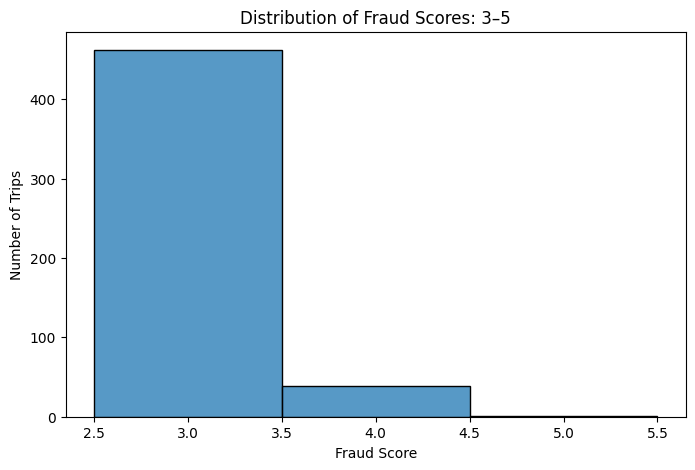

In [ ]:
plt.figure(figsize=(8, 5))

sns.histplot(
    df[df['fraud_score'].isin([3, 4, 5])]['fraud_score'],
    discrete=True
)

plt.title('Distribution of Fraud Scores: 3–5')
plt.xlabel('Fraud Score')
plt.ylabel('Number of Trips')
plt.show()
